# EDA for Choclate Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings(action="ignore")

## DATA CELANING

In [2]:
data=pd.read_csv(r"D:\GL EXERCISES\excel\projects\project\choclate protfolio project - 11.csv")
data

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%


In [3]:
data.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

In [4]:
data["Amount"]=data["Amount"].str.replace("$"," ")
data["Amount"]=data["Amount"].str.replace(",","")
data["Amount"]=data["Amount"].astype("int64")

In [5]:
data["Cost"]=data["Cost"].str.replace("$"," ")
data["Cost"]=data["Cost"].str.replace(",","")
data["Cost"]=data["Cost"].astype(int)

In [6]:
data

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1652,($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,3970,"$2,736",41%
2,Husein Augar,USA,Almond Choco,959,147,12,1746,($787),-82%
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1863,"$7,769",81%
4,Curtice Advani,UK,White Choc,2100,414,13,5444,"($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4348,"($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1697,"$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1559,"$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2710,"($1,996)",-280%


In [7]:
data.drop(["Profit","profit %"],axis=1,inplace=True)

In [8]:
data

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1652
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,3970
2,Husein Augar,USA,Almond Choco,959,147,12,1746
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1863
4,Curtice Advani,UK,White Choc,2100,414,13,5444
...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4348
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1697
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1559
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2710


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    int64 
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    int32 
dtypes: int32(1), int64(3), object(3)
memory usage: 15.4+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,300.0,4136.230000,3124.832629,0.0,1652.0,3437.0,6179.25,16184.0
Units,300.0,152.200000,118.099499,0.0,54.0,124.5,220.50,525.0
cost per unit,300.0,9.473333,3.457717,3.0,6.0,9.0,12.00,17.0
Cost,300.0,1465.703333,1363.647142,0.0,487.0,1079.0,2016.75,8683.0


## DATA ANALYSIS

In [11]:
data_pivot=pd.pivot_table(data,index="Geography",values="Amount",aggfunc="sum")
data_pivot

,Amount
Geography,
Australia,168679
Canada,237944
India,252469
New Zealand,218813
UK,173530
USA,189434


In [12]:
data_pivot=pd.pivot_table(data,index="Product",values="Amount",columns="Geography",aggfunc="sum")
data_pivot

Geography,Australia,Canada,India,New Zealand,UK,USA
Product,,,,,,
50% Dark Bites,6867.0,NaN,9191.0,12656.0,3976.0,10493.0
70% Dark Bites,10129.0,16695.0,3402.0,10206.0,8659.0,17409.0
85% Dark Bars,4760.0,NaN,8862.0,6398.0,10927.0,4431.0
99% Dark & Pure,5474.0,6076.0,17745.0,9702.0,NaN,5747.0
After Nines,8288.0,8435.0,10668.0,12243.0,14294.0,12355.0
Almond Choco,16534.0,10290.0,525.0,1197.0,NaN,5005.0
Baker's Choco Chips,11886.0,98.0,22855.0,23583.0,11753.0,98.0
Caramel Stuffed Bars,12257.0,1827.0,18018.0,16842.0,10780.0,12649.0
Choco Coated Almonds,8827.0,26313.0,17773.0,NaN,NaN,19054.0


In [13]:
data_groupby=data.groupby("Sales Person")["Units","Amount"].agg(np.sum)
data_groupby

,Units,Amount
Sales Person,,
Barr Faughny,4110,123949
Brien Boise,4704,98084
Carla Molina,3867,98210
Ches Bonnell,5295,149975
Curtice Advani,5925,130697
Gigi Bohling,3669,165725
Gunar Cockshoot,5007,106834
Husein Augar,4554,132580
Oby Sorrel,3843,83216


In [14]:
data["Profit"]=data["Amount"]-data["Cost"]

In [15]:
data["Profit_percent"]=((data["Amount"]-data["Cost"])/data["Amount"])*100

In [16]:
data

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_percent
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1652,-28,-1.724138
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,3970,2736,40.799284
2,Husein Augar,USA,Almond Choco,959,147,12,1746,-787,-82.064651
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1863,7769,80.658223
4,Curtice Advani,UK,White Choc,2100,414,13,5444,-3344,-159.238095
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4348,-3410,-363.539446
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1697,7144,80.805339
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1559,2459,61.199602
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2710,-1996,-279.551821


In [17]:
data_pivot=pd.pivot_table(data,index="Geography",values=["Amount","Units"],aggfunc="sum")
data_pivot = data_pivot.sort_values(by=['Amount',"Units"], ascending=False)
data_pivot

,Amount,Units
Geography,,
India,252469,8760
Canada,237944,7302
New Zealand,218813,7431
USA,189434,10158
UK,173530,5745
Australia,168679,6264


In [18]:
data_group_profit=data.groupby(["Product","Geography"])["Profit_percent"].mean()
data_group_profit.sort_values(ascending=True)

Product              Geography  
Mint Chip Choco      UK            -3442.162698
Baker's Choco Chips  Canada        -1065.306122
70% Dark Bites       New Zealand   -1045.518022
Baker's Choco Chips  USA            -808.163265
Almond Choco         New Zealand    -606.480148
                                       ...     
After Nines          Canada           95.139301
Spicy Special Slims  India            96.443208
Mint Chip Choco      Canada           97.608234
Eclairs              Australia        98.837209
Manuka Honey Choco   UK                     NaN
Name: Profit_percent, Length: 119, dtype: float64

In [19]:
data_pt_profit=pd.pivot_table(data,index=("Product"),columns=("Geography"),values=["Profit_percent"],aggfunc=(np.mean))
data_pt_profit.sort_values(by=("Product"),ascending=True)

Profit_percent                                        \
Geography                 Australia       Canada       India  New Zealand   
Product                                                                     
50% Dark Bites            10.744220          NaN  -33.964958    65.852482   
70% Dark Bites            55.365781    49.998438  -55.878895 -1045.518022   
85% Dark Bars             76.093380          NaN   89.404198    92.075649   
99% Dark & Pure           76.543661    44.386249   38.703081    50.635877   
After Nines              -83.891695    95.139301  -53.797476    12.380443   
Almond Choco              85.791906    -5.695840   -8.571429  -606.480148   
Baker's Choco Chips       59.365326 -1065.306122   88.350466    80.919329   
Caramel Stuffed Bars      61.975909  -174.197176   50.666176    48.608761   
Choco Coated Almonds      73.659988    25.604044   69.413689          NaN   
Drinking Coco              1.743532    79.024814         NaN    74.214305   
Eclairs                   98.837209    59.666853   77.564459    91.588908   
Fruit & Nut Bars          44.109133    69.389948   81.106535    82.991719   
Manuka Honey Choco        87.327824    48.195061   79.333281    21.186987   
Milk Bars               -459.767232    69.318655 -100.000000          NaN   
Mint Chip Choco           77.239088    97.608234  -14.463699   -26.103842   
Orange Choco                    NaN          NaN   60.329690    73.713855   
Organic Choco Syrup     -131.261023  -241.287230   38.216754    74.624918   
Peanut Butter Cubes        7.270552    88.610315   56.108315    90.705680   
Raspberry Choco                 NaN          NaN   82.679924   -33.465674   
Smooth Sliky Salty        76.792739    61.236206   52.437981    20.350668   
Spicy Special Slims       92.331249   -14.084507   96.443208  -313.711869   
White Choc                 4.241283    69.130809   41.703048    74.612993   

                                               
Geography                      UK         USA  
Product                                        
50% Dark Bites          78.822938   42.697862  
70% Dark Bites          53.244449   -2.163481  
85% Dark Bars           79.847445   82.554142  
99% Dark & Pure               NaN   38.355470  
After Nines             66.219055   12.826456  
Almond Choco                  NaN  -84.261448  
Baker's Choco Chips     88.511475 -808.163265  
Caramel Stuffed Bars    45.253434   56.189527  
Choco Coated Almonds          NaN   62.203983  
Drinking Coco          -56.757366   74.291613  
Eclairs                 90.686808   40.717432  
Fruit & Nut Bars        62.857143   74.987642  
Manuka Honey Choco            NaN   51.330833  
Milk Bars                     NaN   86.470588  
Mint Chip Choco      -3442.162698   78.269755  
Orange Choco            81.785450  -71.759906  
Organic Choco Syrup    -22.728821  -10.069949  
Peanut Butter Cubes     79.167368 -219.699487  
Raspberry Choco         91.337599   58.286447  
Smooth Sliky Salty      86.321710   70.039975  
Spicy Special Slims     61.628257 -261.904762  
White Choc            -109.747383  -24.878247

In [20]:
styled_table = data_pt_profit.style.format('{:.2f}%').applymap(lambda x: 'background-color: red' if x < 0 else '')
styled_table

In [21]:
data_pt_profit1=pd.pivot_table(data,index=("Product"),values=["Profit_percent"],aggfunc=(np.mean))
data_pt_profit1.sort_values(by=("Product"))

styled_table = data_pt_profit.style.format('{:.2f}%').applymap(lambda x: 'background-color: red' if x < 0 else '')
styled_table

In [22]:
data.corr()

,Amount,Units,cost per unit,Cost,Profit,Profit_percent
Amount,1.000000,0.026546,0.025820,0.015518,0.915547,0.245256
Units,0.026546,1.000000,0.057467,0.881900,-0.330283,-0.104392
cost per unit,0.025820,0.057467,1.000000,0.424138,-0.146813,-0.084146
Cost,0.015518,0.881900,0.424138,1.000000,-0.387955,-0.136500
Profit,0.915547,-0.330283,-0.146813,-0.387955,1.000000,0.280848
Profit_percent,0.245256,-0.104392,-0.084146,-0.136500,0.280848,1.000000


Top country by cost

In [32]:
top_country=pd.pivot_table(data,index="Geography",values="Cost",aggfunc=np.sum)
top_country

,Cost
Geography,
Australia,60689
Canada,68260
India,80681
New Zealand,68927
UK,53941
USA,107213


Top 5 customer by units sold

In [34]:
top_Sales_person=pd.pivot_table(data,index="Sales Person",values="Units",aggfunc=np.sum)
top_Sales_person.head(5)

,Units
Sales Person,
Barr Faughny,4110
Brien Boise,4704
Carla Molina,3867
Ches Bonnell,5295
Curtice Advani,5925


## DATA VISUALIZATION

In [23]:
data_numeric=data.select_dtypes(include="int")
data_numeric

,Amount,Units,cost per unit,Cost,Profit
0,1624,114,14,1652,-28
1,6706,459,9,3970,2736
2,959,147,12,1746,-787
3,9632,288,6,1863,7769
4,2100,414,13,5444,-3344
...,...,...,...,...,...
295,938,366,12,4348,-3410
296,8841,303,6,1697,7144
297,4018,126,12,1559,2459
298,714,231,12,2710,-1996


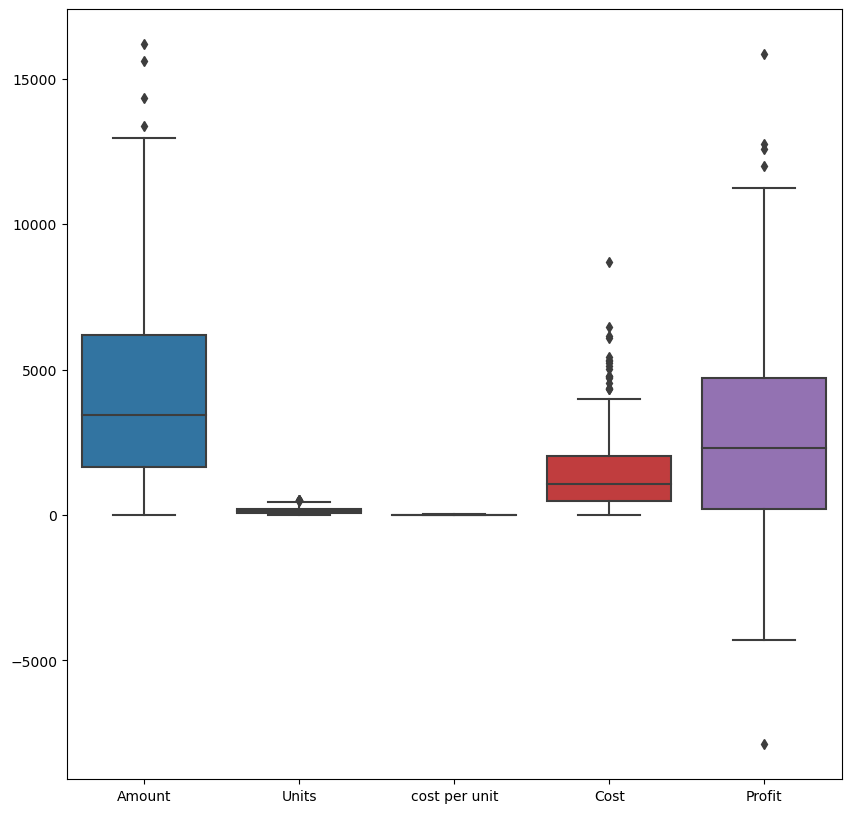

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_numeric)
plt.show()

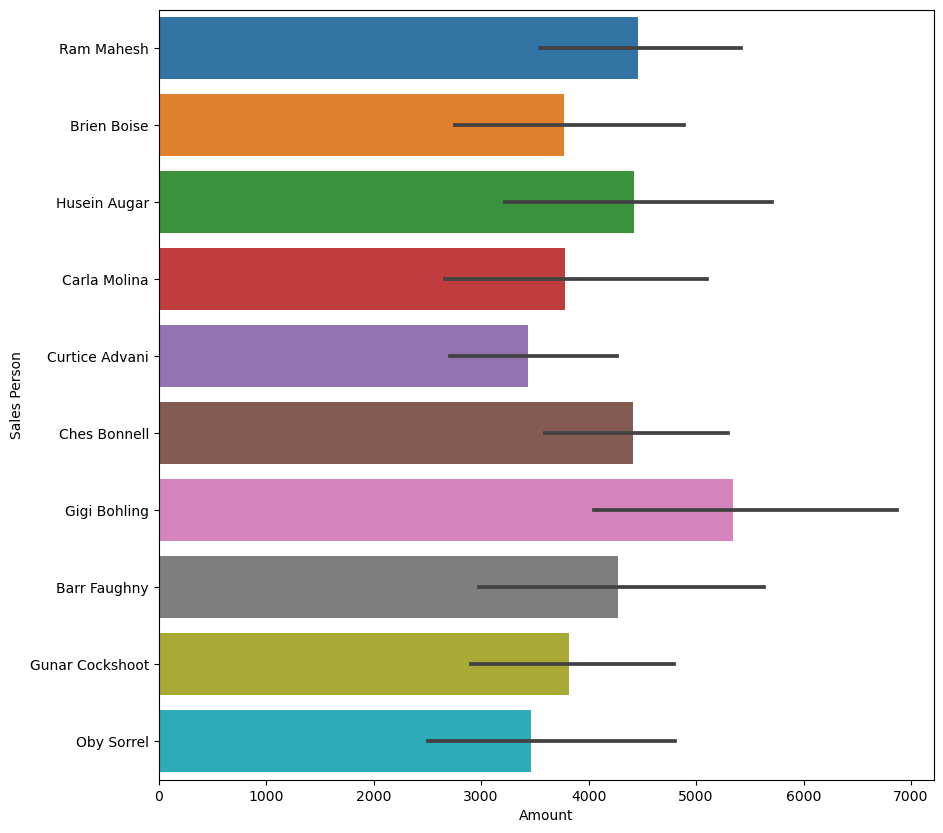

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(y=data["Sales Person"],x=data["Amount"])
plt.show()

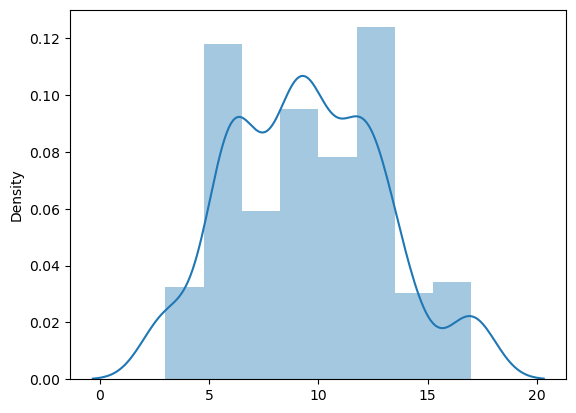

In [26]:
sns.distplot(x=data["cost per unit"])
plt.show()

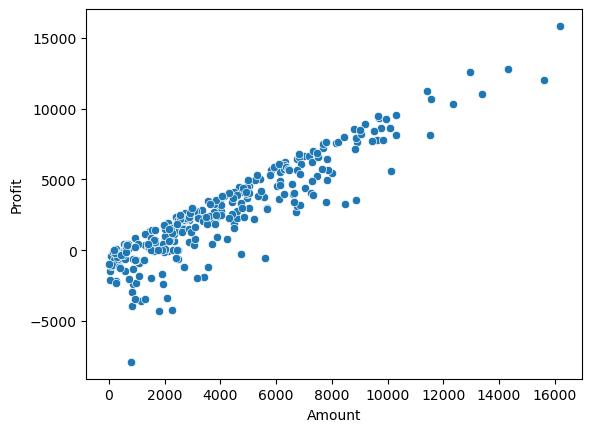

In [27]:
sns.scatterplot(data=data,x="Amount",y="Profit")
plt.show()

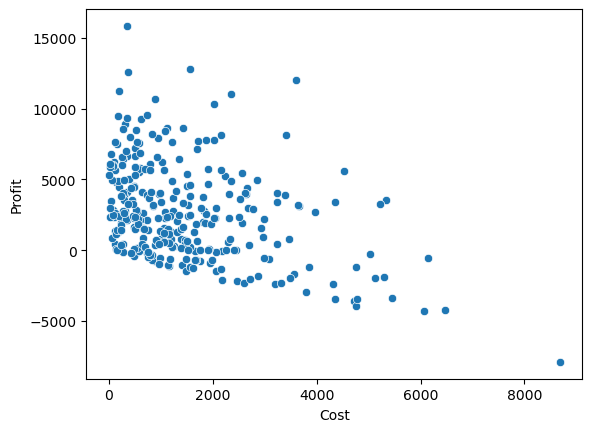

In [28]:
sns.scatterplot(data=data,x="Cost",y="Profit")
plt.show()

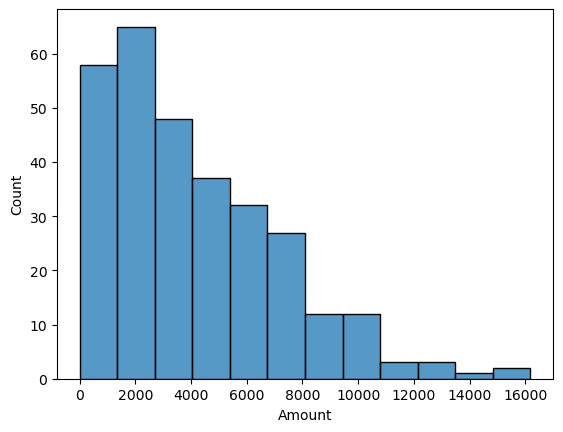

In [29]:
sns.histplot(data["Amount"])
plt.show()

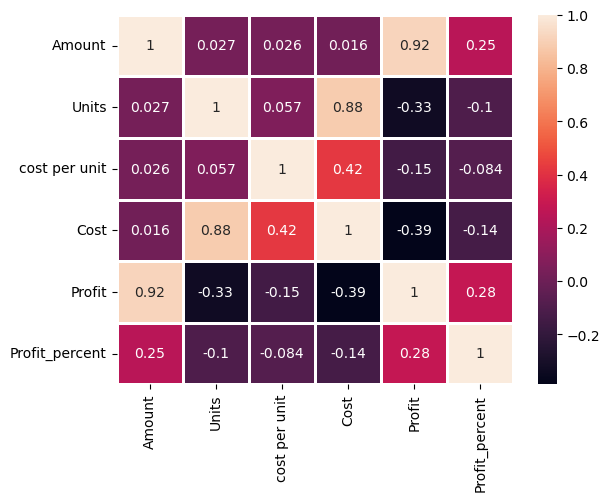

In [30]:
sns.heatmap(data.corr(),annot=True,linewidth=1)
plt.show()

BY THIS ANALYSIS AND VISUALIZATION WE CAN UNDERSTAND 
* THE DATA DISTRIBUTTION OF THE DATASET, WE CAN ALSO ANALYIZE THE FURTHER PROCESS 
* WE CAN ALSO PREDICT THE PROFIT AND LOSSES FOR THE COMPANY AND HELP THE COMPANY TO TAKE SOME IMPORTANT MEASURES TO INCREASE THEIR PROFIT BY FOCUSING ON THE LOSSES BY GEOGRAPHYICALLY AS WELL AS BY THE PRODUCTS